# Polynomial Regression
**Polynomial Regression** is used to model non linear relationships/ find patterns in non linear data (data with little to no correlation).

In [4]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# Generating a non-linaer dataset
X = 6 * np.random.rand(100, 1) - 3
# Quadratic Equation
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100, 1)

Text(0, 0.5, 'y Dataset')

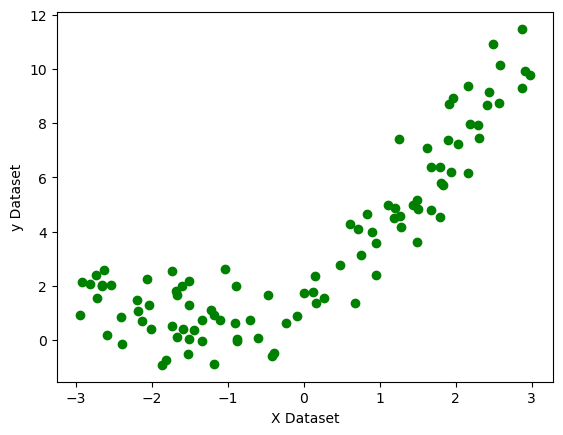

In [31]:
plt.scatter(X, y, color = "g")
plt.xlabel("X Dataset")
plt.ylabel("y Dataset")

In [32]:
X.shape, y.shape

((100, 1), (100, 1))

In [33]:
# Checking the correlation
df = pd.DataFrame()
df["X"] = pd.DataFrame(X)
df["y"] = pd.DataFrame(y)
df.corr()

,X,y
X,1.000000,0.843404
y,0.843404,1.000000


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
#3 Implementging simple linear regression
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [36]:
regression_1.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regression_1.predict(X_test))
score

0.5747804482733048

Text(0, 0.5, 'y Dataset')

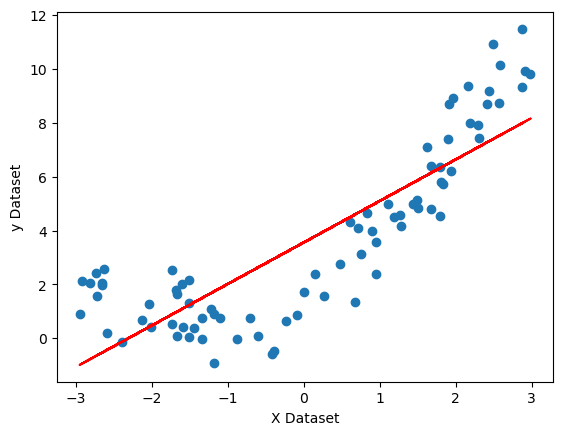

In [38]:
## Visualizing the model
plt.plot(X_train, regression_1.predict(X_train), color = "r")
plt.scatter(X_train, y_train)
plt.xlabel("X Dataset")
plt.ylabel("y Dataset")
## By inspecting this best fit line,we can see that we will be getting a lotof errors

In [39]:
## With polynomial regression, if it does not work with your initial degree value
## just keep increasing the polynomial degree value until the model perform well
# We wil apply polynomial transformations
from sklearn.preprocessing import PolynomialFeatures
#Include_bias means include 1 (which is B0 in the quadratic equation)
poly = PolynomialFeatures(degree = 2, include_bias = True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test) # No fit to avoid data leakage

In [40]:
X_train_poly

array([[ 1.00000000e+00,  2.58461493e+00,  6.68023433e+00],
       [ 1.00000000e+00,  1.44777696e-01,  2.09605812e-02],
       [ 1.00000000e+00,  8.32000508e-01,  6.92224845e-01],
       [ 1.00000000e+00, -1.33613360e+00,  1.78525300e+00],
       [ 1.00000000e+00, -8.76585562e-01,  7.68402248e-01],
       [ 1.00000000e+00,  1.90697220e+00,  3.63654296e+00],
       [ 1.00000000e+00, -2.59517689e+00,  6.73494309e+00],
       [ 1.00000000e+00, -1.66933211e+00,  2.78666968e+00],
       [ 1.00000000e+00,  1.19158773e+00,  1.41988131e+00],
       [ 1.00000000e+00, -2.66368430e+00,  7.09521407e+00],
       [ 1.00000000e+00,  1.27182779e+00,  1.61754592e+00],
       [ 1.00000000e+00, -1.22590264e+00,  1.50283729e+00],
       [ 1.00000000e+00, -1.66519880e+00,  2.77288703e+00],
       [ 1.00000000e+00, -9.14497932e-02,  8.36306467e-03],
       [ 1.00000000e+00,  6.17786200e-03,  3.81659788e-05],
       [ 1.00000000e+00, -1.51421511e+00,  2.29284740e+00],
       [ 1.00000000e+00, -2.95289769e+00

In [41]:
# Once you have the new data you can apply the linear regression model to it
# and get better results
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
score

0.7481344024604542

In [42]:
# There are 3 coefficients because we now have three features
regression.coef_

array([[0.        , 1.54728885, 0.56907626]])

In [43]:
regression.intercept_

array([1.67361986])

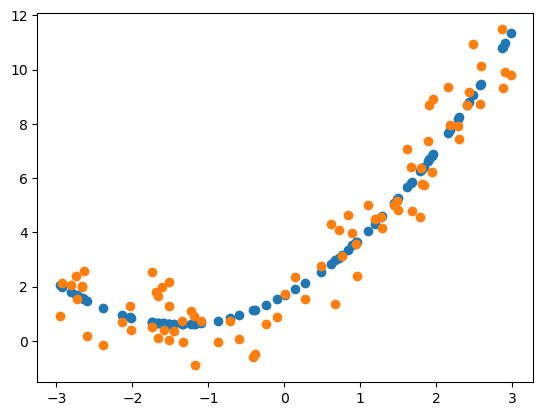

In [44]:
# Visualizing the best fit line to see if it has improved
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

In [45]:
#The plot above shows amazing improvement
#Now I will test to see what will happen if I make the degree = 3 instead of 2
#Include_bias means include 1 (which is B0 in the quadratic equation)
poly3 = PolynomialFeatures(degree = 3, include_bias = True)
X_train_poly = poly3.fit_transform(X_train)
X_test_poly = poly3.transform(X_test) # No fit to avoid data leakage

In [46]:
# now we have 4 features
X_train_poly

array([[ 1.00000000e+00,  2.58461493e+00,  6.68023433e+00,
         1.72658334e+01],
       [ 1.00000000e+00,  1.44777696e-01,  2.09605812e-02,
         3.03462465e-03],
       [ 1.00000000e+00,  8.32000508e-01,  6.92224845e-01,
         5.75931422e-01],
       [ 1.00000000e+00, -1.33613360e+00,  1.78525300e+00,
        -2.38533652e+00],
       [ 1.00000000e+00, -8.76585562e-01,  7.68402248e-01,
        -6.73570317e-01],
       [ 1.00000000e+00,  1.90697220e+00,  3.63654296e+00,
         6.93478631e+00],
       [ 1.00000000e+00, -2.59517689e+00,  6.73494309e+00,
        -1.74783687e+01],
       [ 1.00000000e+00, -1.66933211e+00,  2.78666968e+00,
        -4.65187717e+00],
       [ 1.00000000e+00,  1.19158773e+00,  1.41988131e+00,
         1.69191314e+00],
       [ 1.00000000e+00, -2.66368430e+00,  7.09521407e+00,
        -1.88994103e+01],
       [ 1.00000000e+00,  1.27182779e+00,  1.61754592e+00,
         2.05723984e+00],
       [ 1.00000000e+00, -1.22590264e+00,  1.50283729e+00,
      

In [47]:
# Once you have the new data you can apply the linear regression model to it
# and get better results
regression_3 = LinearRegression()
regression_3.fit(X_train_poly, y_train)
y_pred = regression_3.predict(X_test_poly)
score = r2_score(y_test, y_pred)
score

0.7504651365595947

In [48]:
# There was a minor increase which was good, not crazy impactful so you can get away with
## degree = 2 for this dastaset if you really want to 

# Feeding new data to the model
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly3.transform(X_new)

In [49]:
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

In [50]:
y_pred_new = regression_3.predict(X_new_poly)
y_pred_new

array([[ 2.38678395],
       [ 2.31679561],
       [ 2.2482006 ],
       [ 2.18099528],
       [ 2.115176  ],
       [ 2.05073911],
       [ 1.98768095],
       [ 1.92599788],
       [ 1.86568624],
       [ 1.8067424 ],
       [ 1.74916269],
       [ 1.69294347],
       [ 1.6380811 ],
       [ 1.58457191],
       [ 1.53241226],
       [ 1.4815985 ],
       [ 1.43212698],
       [ 1.38399406],
       [ 1.33719607],
       [ 1.29172938],
       [ 1.24759033],
       [ 1.20477527],
       [ 1.16328056],
       [ 1.12310254],
       [ 1.08423757],
       [ 1.04668198],
       [ 1.01043215],
       [ 0.97548441],
       [ 0.94183511],
       [ 0.90948061],
       [ 0.87841726],
       [ 0.8486414 ],
       [ 0.82014939],
       [ 0.79293758],
       [ 0.76700231],
       [ 0.74233995],
       [ 0.71894683],
       [ 0.69681931],
       [ 0.67595375],
       [ 0.65634648],
       [ 0.63799386],
       [ 0.62089224],
       [ 0.60503798],
       [ 0.59042741],
       [ 0.5770569 ],
       [ 0

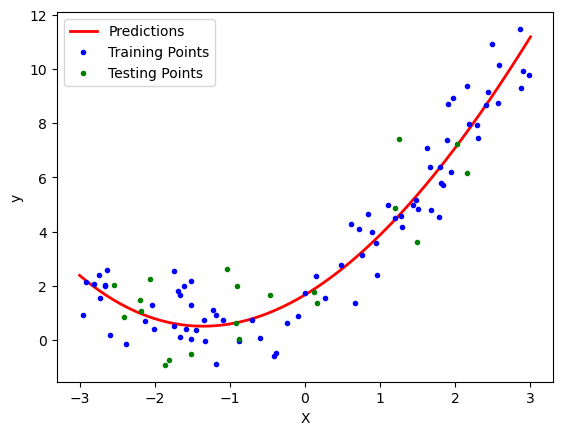

In [51]:
## Visualizing the predictions
plt.plot(X_new, y_pred_new, "r-", linewidth = 2, label = "Predictions")
plt.plot(X_train, y_train, "b.", label = "Training Points")
plt.plot(X_test, y_test, "g.", label = "Testing Points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Pipelines

In [52]:
from sklearn.pipeline import Pipeline

In [55]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    poly_features = PolynomialFeatures(degree = degree, include_bias = True)
    lin_reg = LinearRegression()

    #Creating and training the pipeline
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    poly_regression.fit(X_train, y_train)
    y_pred = poly_regression.predict(X_new)

    ## Plotting the prediction line
    plt.plot(X_new, y_pred_new, "r", linewidth = 3, label = "Degree " + str(degree) )
    plt.plot(X_train, y_train, "b.", label = "Training Points", linewidth = 3)
    plt.plot(X_test, y_test, "g.", label = "Testing Points", linewidth = 3)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend(loc = "upper left")
    plt.axis([-4, 4, 0, 10])
    plt.show()

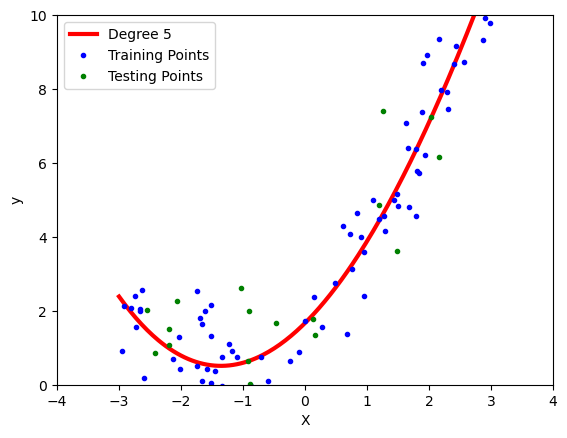

In [56]:
poly_regression(5)